-------------
# **Exploratory Data Analysis**
-------------

## **Dataset**
------
- Contains the store page data of all **55,691 products** (not including DLC and other secondary content) on the online PC gaming store Steam
- Data last collected on the 8th of November 2022
- Data was collected using the Steam store API and steamspy.com
- Dataset was sourced from the kaggle entry "**All 55,000 Games on Steam (November 2022)**" at this link. https://www.kaggle.com/datasets/tristan581/all-55000-games-on-steam-november-2022
- Data was provided as a zipped CSV file

## **Data Dictionary:**
- product genre
- tags
- categories
- languages
- Number of positive reviews
- Number of negative reviews
    0 these reviews MIGHT serve as a proxy for # units sold

- OTHER CATEGORY TYPES PENDING!! 

---------
## **Objective**
-------
- ID units sold?
- Better understanding of gaming industry?
- Better understanding of streaming service model?

## **Libraries**

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 100)

import warnings
warnings.filterwarnings("ignore")

### **Importing the Dataset**

In [6]:
GAMES = pd.read_csv("datasets/steam_games.csv", sep=";")

In [7]:
# Savong the dataset to another variable
data = GAMES.copy()

### **View the first and last 5 rows of the dataset**

In [10]:
data.head()

,App ID,Name,Short Description,Developer,Publisher,Genre,Tags,Type,Categories,Owners,Positive Reviews,Negative Reviews,Price,Initial Price,Discount,CCU,Languages,Platforms,Release Date,Required Age,Website,Header Image
0,10,Counter-Strike,Play the world's number 1 online action game. ...,Valve,Valve,Action,"Action: 5426, FPS: 4831, Multiplayer: 3392, Sh...",game,"Multi-player, Valve Anti-Cheat enabled, Online...","10,000,000 .. 20,000,000",201215,5199,999,999,0,13990,"English, French, German, Italian, Spanish - Sp...","windows, mac, linux",2000/11/1,0,NaN,https://cdn.akamai.steamstatic.com/steam/apps/...
1,1000000,ASCENXION,ASCENXION is a 2D shoot 'em up game where you ...,IndigoBlue Game Studio,PsychoFlux Entertainment,"Action, Adventure, Indie","""Shoot Em Up"": 186, Metroidvania: 181, Bullet ...",game,"Single-player, Partial Controller Support, Ste...","0 .. 20,000",27,5,999,999,0,0,"English, Korean, Simplified Chinese",windows,2021/05/14,0,NaN,https://cdn.akamai.steamstatic.com/steam/apps/...
2,1000010,Crown Trick,"Enter a labyrinth that moves as you move, wher...",NEXT Studios,"Team17, NEXT Studios","Adventure, Indie, RPG, Strategy","Rogue-like: 268, Turn-Based Combat: 254, RPG: ...",game,"Single-player, Partial Controller Support, Ste...","200,000 .. 500,000",4032,646,599,1999,70,99,"Simplified Chinese, English, Japanese, Traditi...",windows,2020/10/16,0,NaN,https://cdn.akamai.steamstatic.com/steam/apps/...
3,1000030,"Cook, Serve, Delicious! 3?!","Cook, serve and manage your food truck as you ...",Vertigo Gaming Inc.,Vertigo Gaming Inc.,"Action, Indie, Simulation, Strategy","Typing: 221, Management: 213, Casual: 209, Dif...",game,"Multi-player, Single-player, Co-op, Steam Achi...","100,000 .. 200,000",1575,115,1999,1999,0,76,English,"windows, mac",2020/10/14,0,http://www.cookservedelicious.com,https://cdn.akamai.steamstatic.com/steam/apps/...
4,1000040,细胞战争,这是一款打击感十足的细胞主题游戏！操作简单但活下去却不简单，“你”作为侵入人体的细菌病毒，通...,DoubleC Games,DoubleC Games,"Action, Casual, Indie, Simulation","Action: 22, Casual: 22, Indie: 21, Simulation: 20",game,Single-player,"0 .. 20,000",0,1,199,199,0,0,Simplified Chinese,windows,2019/03/30,0,NaN,https://cdn.akamai.steamstatic.com/steam/apps/...


In [13]:
data.tail()

,App ID,Name,Short Description,Developer,Publisher,Genre,Tags,Type,Categories,Owners,Positive Reviews,Negative Reviews,Price,Initial Price,Discount,CCU,Languages,Platforms,Release Date,Required Age,Website,Header Image
55686,999880,NASA's Exoplanet Excursions,Take VR journeys through the amazing TRAPPIST-...,"Caltech/IPAC, NASA's Jet Propulsion Laboratory","Caltech/IPAC, NASA's Jet Propulsion Laboratory",Education,"Education: 22, VR: 6, Space: 5",game,NaN,"0 .. 20,000",12,3,0,0,0,0,English,windows,2019/04/18,0,http://www.spitzer.caltech.edu/vr,https://cdn.akamai.steamstatic.com/steam/apps/...
55687,999890,Bruken,"Explore a large spherical world, enjoying all ...",FlairBot Games,FlairBot Games,"Adventure, Casual, Indie","Casual: 21, Indie: 21, Adventure: 20",game,Single-player,"0 .. 20,000",2,0,299,299,0,0,English,windows,2019/04/11,0,NaN,https://cdn.akamai.steamstatic.com/steam/apps/...
55688,999900,Studio by RADiCAL,"RADiCAL Studio is a real-time, unlimited motio...",RADiCAL,"RADiCAL Solutions, LLC",Animation & Modeling,"Animation & Modeling: 25, 3D: 13",game,NaN,"20,000 .. 50,000",12,19,0,0,0,0,English,windows,2019/01/4,0,https://getrad.co,https://cdn.akamai.steamstatic.com/steam/apps/...
55689,999930,Fantasy Sino-Japanese War 幻想甲午,You unfortunately passed through the Sino-Japa...,张八万工作室,张八万工作室,"Indie, RPG, Strategy, Early Access","Early Access: 21, Indie: 20, RPG: 20, Strategy...",game,"Single-player, Partial Controller Support, Ste...","0 .. 20,000",2,2,499,499,0,0,"English, Simplified Chinese, Traditional Chinese",windows,2019/01/11,0,NaN,https://cdn.akamai.steamstatic.com/steam/apps/...
55690,999990,Bouncing Hero,Bouncing Hero is an extreme auto-jump platform...,"ZPink, zniq.co",PsychoFlux Entertainment,"Action, Casual, Indie","Action: 42, Casual: 41, Indie: 41, Platformer:...",game,"Single-player, Steam Achievements, Steam Cloud","0 .. 20,000",10,0,499,499,0,0,"English, Japanese, Korean",windows,2019/09/1,0,http://www.bouncinghero.com/,https://cdn.akamai.steamstatic.com/steam/apps/...


**Observation:**

- Not only in English
- Names seem to have odd chars and have non-english titles
- What is CCU?
- Many 0s in Price, Initial PPrice, Discount
- Possible columes to drop:
    - App ID (unique and not informative)
    - Required Age (many 0s)
    - Website (many NaN)
    - Header Image (unique and not informative)

### **Dataset shape**

In [14]:
data.shape

(55691, 22)

## **Observations:**
- The shape of this dataset is **(55691, 22)**
    - **55,691 rows**
    - **22 columns**

### **Identify nulls and datatypes in this dataset**

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55691 entries, 0 to 55690
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   App ID             55691 non-null  int64 
 1   Name               55691 non-null  object
 2   Short Description  55654 non-null  object
 3   Developer          55562 non-null  object
 4   Publisher          55540 non-null  object
 5   Genre              55530 non-null  object
 6   Tags               55556 non-null  object
 7   Type               55691 non-null  object
 8   Categories         54721 non-null  object
 9   Owners             55691 non-null  object
 10  Positive Reviews   55691 non-null  int64 
 11  Negative Reviews   55691 non-null  int64 
 12  Price              55691 non-null  int64 
 13  Initial Price      55691 non-null  int64 
 14  Discount           55691 non-null  int64 
 15  CCU                55691 non-null  int64 
 16  Languages          55680 non-null  objec

**Observations:**
- XXXX

### **Identify any missing values in the dataset** ###

In [16]:
data.isnull().sum()

App ID                   0
Name                     0
Short Description       37
Developer              129
Publisher              151
Genre                  161
Tags                   135
Type                     0
Categories             970
Owners                   0
Positive Reviews         0
Negative Reviews         0
Price                    0
Initial Price            0
Discount                 0
CCU                      0
Languages               11
Platforms                0
Release Date            99
Required Age             0
Website              25217
Header Image             0
dtype: int64

**Observation:**
- XXX

### **Check for any duplicates **

In [17]:
# Checking for duplicate values
data.duplicated().sum()

0

**Observation:**
- No duplicates found

--------
## **Exploratory Data Analysis**
---------

### **Statistical Summary**

In [18]:
data.describe(include = "all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
App ID,55691.0,NaN,NaN,NaN,1025603.092672,522784.968328,10.0,598540.0,986350.0,1427945.0,2190950.0
Name,55691,55430,Alone,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Short Description,55654,55331,Find the objects that are hidden on the map.,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Developer,55562,34770,Choice of Games,140,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Publisher,55540,29962,Big Fish Games,422,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Genre,55530,1831,"Action, Indie",3460,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Tags,55556,52713,"Casual: 21, Indie: 21",152,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Type,55691,2,game,55690,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Categories,54721,4927,Single-player,14372,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Owners,55691,13,"0 .. 20,000",38072,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Observations:**
- XXXX

----------
### **Find the count of each unique category in each of the categorical variables**
--------

In [36]:
print(data[['Type']].to_string(index=False))

    Type
    game
    game
    game
    game
    game
    game
    game
    game
    game
    game
    game
    game
    game
    game
    game
    game
    game
    game
    game
    game
    game
    game
    game
    game
    game
    game
    game
    game
    game
    game
    game
    game
    game
    game
    game
    game
    game
    game
    game
    game
    game
    game
    game
    game
    game
    game
    game
    game
    game
    game
    game
    game
    game
    game
    game
    game
    game
    game
    game
    game
    game
    game
    game
    game
    game
    game
    game
    game
    game
    game
    game
    game
    game
    game
    game
    game
    game
    game
    game
    game
    game
    game
    game
    game
    game
    game
    game
    game
    game
    game
    game
    game
    game
    game
    game
    game
    game
    game
    game
    game
    game
    game
    game
    game
    game
    game
    game
    game
    game
    game
 

In [30]:
cat_col = list(data.select_dtypes("object").columns)

for column in cat_col:
    print(data[column].value_counts())
    print("-" * 50)

Alone                    5
Aurora                   4
Escape                   4
Dodge                    4
Lost                     4
                        ..
HuoChaiRenRPG            1
Hack Bomb BOMA-YE        1
Heltons Haunted Hotel    1
Unusual Findings         1
Bouncing Hero            1
Name: Name, Length: 55430, dtype: int64
--------------------------------------------------
Choice of Games               140
Creobit                       122
Laush Dmitriy Sergeevich      108
Sokpop Collective              98
KOEI TECMO GAMES CO., LTD.     90
                             ... 
Kaleb Wassa                     1
Artur Smiarowski                1
Jugular Studios                 1
Mosphere Games                  1
ZPink, zniq.co                  1
Name: Developer, Length: 34770, dtype: int64
--------------------------------------------------
Big Fish Games       422
8floor               202
SEGA                 165
Strategy First       151
Square Enix          141
                 

**Observations:**
- XXX

### **If there are columns that have slightly different names but should be brought together....**

In [ ]:
# Replacing reg with Regular in Product_Sugar_Content feature
# data.Product_Sugar_Content.replace(to_replace = ["reg"], value = ["Regular"], inplace = True)

In [ ]:
# data.Product_Sugar_Content.value_counts()

Low Sugar    4885
Regular      2359
No Sugar     1519
Name: Product_Sugar_Content, dtype: int64

**Observation:**
- DID IT WORK?

**If a column is fully unique, drop it...**

In [47]:
data.Type.value_counts()

game        55690
hardware        1
Name: Type, dtype: int64

Columns dropped are:
- App ID
- Type
- Short Description
- Required Age
- Website
- Header Image
- Tags

In [89]:
data = data.drop(["Tags"], axis = 1)

In [90]:
data.head()

,Name,Developer,Publisher,Genre,Categories,Owners,Positive Reviews,Negative Reviews,Price,Initial Price,Discount,CCU,Languages,Platforms,Release Date
0,Counter-Strike,Valve,Valve,Action,"Multi-player, Valve Anti-Cheat enabled, Online...","10,000,000 .. 20,000,000",201215,5199,999,999,0,13990,"English, French, German, Italian, Spanish - Sp...","windows, mac, linux",2000/11/1
1,ASCENXION,IndigoBlue Game Studio,PsychoFlux Entertainment,"Action, Adventure, Indie","Single-player, Partial Controller Support, Ste...","0 .. 20,000",27,5,999,999,0,0,"English, Korean, Simplified Chinese",windows,2021/05/14
2,Crown Trick,NEXT Studios,"Team17, NEXT Studios","Adventure, Indie, RPG, Strategy","Single-player, Partial Controller Support, Ste...","200,000 .. 500,000",4032,646,599,1999,70,99,"Simplified Chinese, English, Japanese, Traditi...",windows,2020/10/16
3,"Cook, Serve, Delicious! 3?!",Vertigo Gaming Inc.,Vertigo Gaming Inc.,"Action, Indie, Simulation, Strategy","Multi-player, Single-player, Co-op, Steam Achi...","100,000 .. 200,000",1575,115,1999,1999,0,76,English,"windows, mac",2020/10/14
4,细胞战争,DoubleC Games,DoubleC Games,"Action, Casual, Indie, Simulation",Single-player,"0 .. 20,000",0,1,199,199,0,0,Simplified Chinese,windows,2019/03/30


In [92]:
data['Platforms'].value_counts()

windows                41271
windows, mac, linux     6807
windows, mac            5951
windows, linux          1647
mac                       11
linux                      3
mac, linux                 1
Name: Platforms, dtype: int64

----
### **Change date string object to pandas datetime**
------

In [93]:
print(data.dtypes['Release Date'])

object


In [97]:
data['Release Date'] = pd.to_datetime(data['Release Date'])

In [98]:
data

,Name,Developer,Publisher,Genre,Categories,Owners,Positive Reviews,Negative Reviews,Price,Initial Price,Discount,CCU,Languages,Platforms,Release Date
0,Counter-Strike,Valve,Valve,Action,"Multi-player, Valve Anti-Cheat enabled, Online...","10,000,000 .. 20,000,000",201215,5199,999,999,0,13990,"English, French, German, Italian, Spanish - Sp...","windows, mac, linux",2000-11-01
1,ASCENXION,IndigoBlue Game Studio,PsychoFlux Entertainment,"Action, Adventure, Indie","Single-player, Partial Controller Support, Ste...","0 .. 20,000",27,5,999,999,0,0,"English, Korean, Simplified Chinese",windows,2021-05-14
2,Crown Trick,NEXT Studios,"Team17, NEXT Studios","Adventure, Indie, RPG, Strategy","Single-player, Partial Controller Support, Ste...","200,000 .. 500,000",4032,646,599,1999,70,99,"Simplified Chinese, English, Japanese, Traditi...",windows,2020-10-16
3,"Cook, Serve, Delicious! 3?!",Vertigo Gaming Inc.,Vertigo Gaming Inc.,"Action, Indie, Simulation, Strategy","Multi-player, Single-player, Co-op, Steam Achi...","100,000 .. 200,000",1575,115,1999,1999,0,76,English,"windows, mac",2020-10-14
4,细胞战争,DoubleC Games,DoubleC Games,"Action, Casual, Indie, Simulation",Single-player,"0 .. 20,000",0,1,199,199,0,0,Simplified Chinese,windows,2019-03-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55686,NASA's Exoplanet Excursions,"Caltech/IPAC, NASA's Jet Propulsion Laboratory","Caltech/IPAC, NASA's Jet Propulsion Laboratory",Education,NaN,"0 .. 20,000",12,3,0,0,0,0,English,windows,2019-04-18
55687,Bruken,FlairBot Games,FlairBot Games,"Adventure, Casual, Indie",Single-player,"0 .. 20,000",2,0,299,299,0,0,English,windows,2019-04-11
55688,Studio by RADiCAL,RADiCAL,"RADiCAL Solutions, LLC",Animation & Modeling,NaN,"20,000 .. 50,000",12,19,0,0,0,0,English,windows,2019-01-04
55689,Fantasy Sino-Japanese War 幻想甲午,张八万工作室,张八万工作室,"Indie, RPG, Strategy, Early Access","Single-player, Partial Controller Support, Ste...","0 .. 20,000",2,2,499,499,0,0,"English, Simplified Chinese, Traditional Chinese",windows,2019-01-11


----------
## **Univariate Analysis**
----------

### **Create boxplots and histograms to explore and visualize data**

In [99]:
# This method creates a boxplot and a histogram along the same scale

def histogram_boxplot(data, feature, figsize = (12, 7), kde = False, bins = None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows = 2,  # Number of rows of the subplot grid = 2
        sharex = True,  # x-axis will be shared among all subplots
        gridspec_kw = {"height_ratios": (0.25, 0.75)},
        figsize = figsize,
    )  # Creating the 2 subplots
    sns.boxplot(
        data = data, x = feature, ax = ax_box2, showmeans = True, color = "violet"
    )  # Boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data = data, x = feature, kde = kde, ax = ax_hist2, bins = bins, palette = "winter"
    ) if bins else sns.histplot(
        data = data, x = feature, kde = kde, ax = ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color = "green", linestyle = "--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color = "black", linestyle = "-"
    )  # Add median to the histogram

---------
**Choose a column to study**
----------

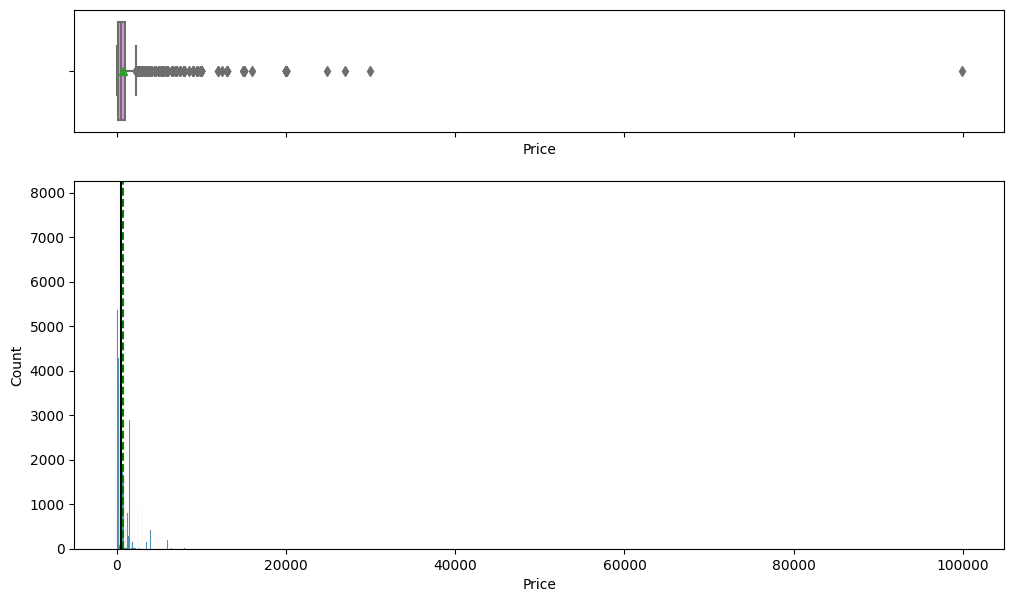

In [103]:
histogram_boxplot(data, "Price")

**Observation:**
- XXXXX

-------
## **Visualize the various types under a category type**
_______

In [107]:
# Method to create labeled barplots

def labeled_barplot(data, feature, perc = False, n = None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # Length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize = (count + 1, 5))
    else:
        plt.figure(figsize = (n + 1, 5))

    plt.xticks(rotation = 90, fontsize = 15)
    ax = sns.countplot(
        data = data,
        x = feature,
        palette = "Paired",
        order = data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # Percentage of each class of the category
        else:
            label = p.get_height()  # Count of each level of the category

        x = p.get_x() + p.get_width() / 2  # Width of the plot
        y = p.get_height()  # Height of the plot

        ax.annotate(
            label,
            (x, y),
            ha = "center",
            va = "center",
            size = 12,
            xytext = (0, 5),
            textcoords = "offset points",
        )  # Annotate the percentage

    plt.show()  # Show the plot

**A Category with multiple types**

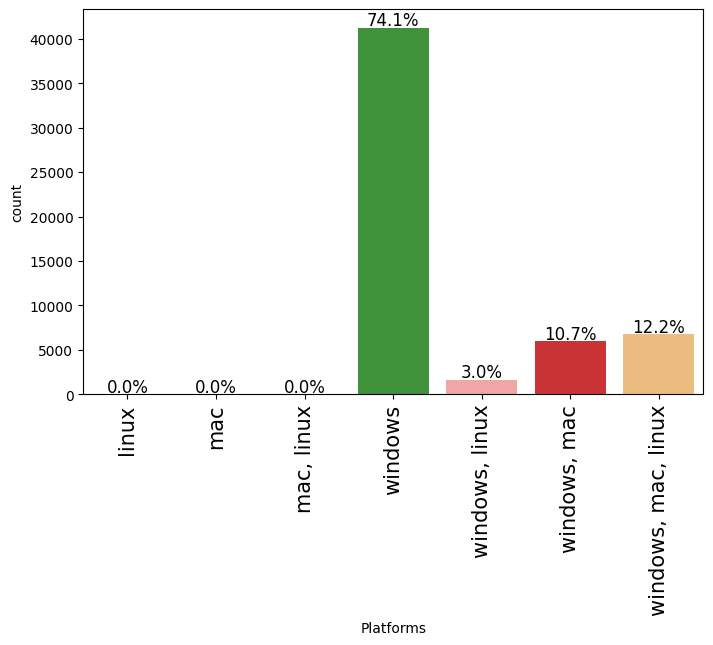

In [109]:
labeled_barplot(data, "Platforms", perc = True)

**Observations:**
- xxx

In [110]:
labeled_barplot(data, "Genre", perc = True)

ValueError: Image size of 183200x500 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 183200x500 with 1 Axes>

----------
### **Bivariate Analysis**
----------

### **Correlation Matrix as heatmap**

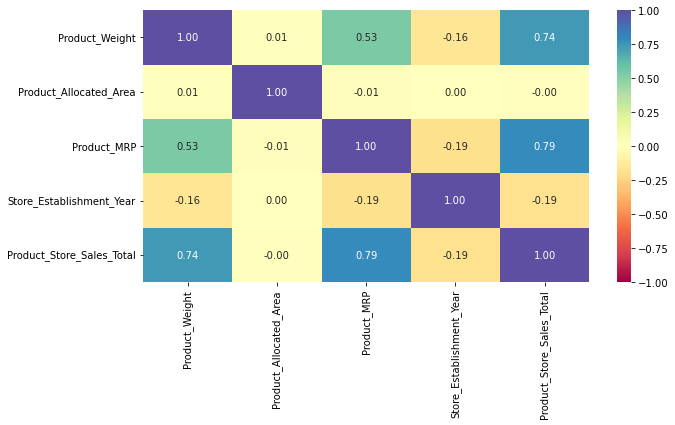

In [ ]:
cols_list = data.select_dtypes(include = np.number).columns.tolist()

plt.figure(figsize = (10, 5))
sns.heatmap(
    data[cols_list].corr(), annot = True, vmin = -1, vmax = 1, fmt = ".2f", cmap = "Spectral"
)
plt.show()

**Observations:**
- xxxxx

**Visualize the distribution of the target categorical variable (dependent or experimental, all depending on scope of the project) with the numeric columns with a SCATTERPLOT** 

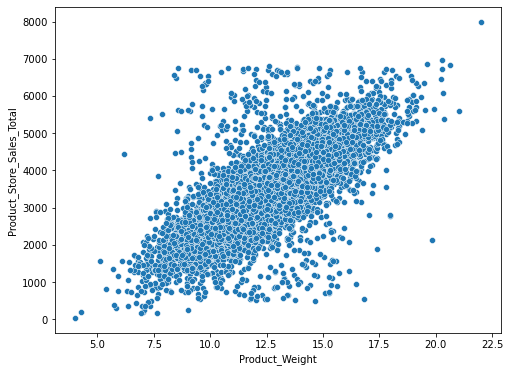

In [ ]:
plt.figure(figsize = [8, 6])
sns.scatterplot(x = data.Product_Weight, y = data.Product_Store_Sales_Total)
plt.show()

**Observation:**
- xxx 

-------
## **Visualize relationships across multiple classes under a multi-class category against the target variable**
-------

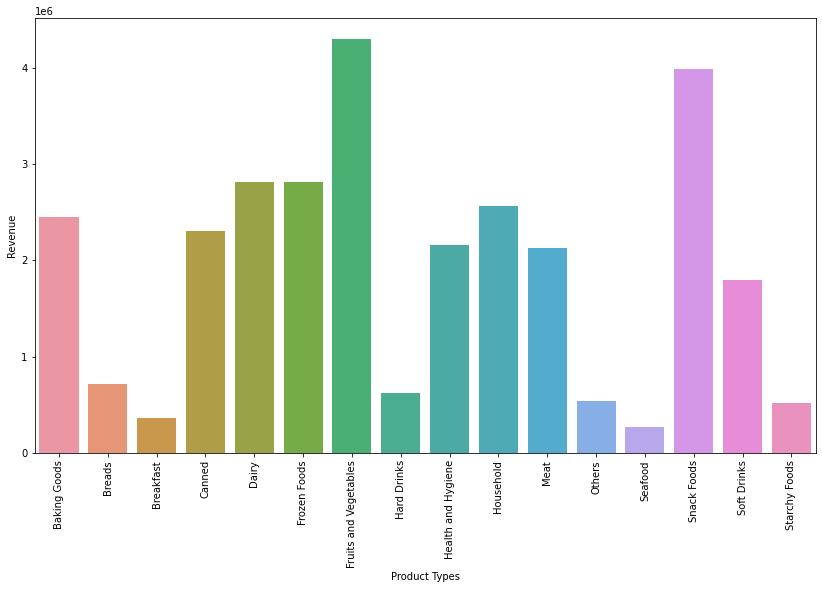

In [ ]:
df_NEW_DATAFRAME_1 = data.groupby(["MULTICLASS_COLUMN_NAME"], as_index = False)[
    "TARGET_VARIABLE"
].sum()
plt.figure(figsize = [14, 8])
plt.xticks(rotation = 90)
a = sns.barplot(x = df_NEW_DATAFRAME_1, y = df_NEW_DATAFRAME_1.TARGET_VARIABLE)
a.set_xlabel("Column Label")
a.set_ylabel("Target variable name")
plt.show()

**Observations:**
- xxx

---------
**Visualize the distribution of the target variable with the other multi-class categorical columns (MULTICLASS_COLUMN_NAME)**
---------

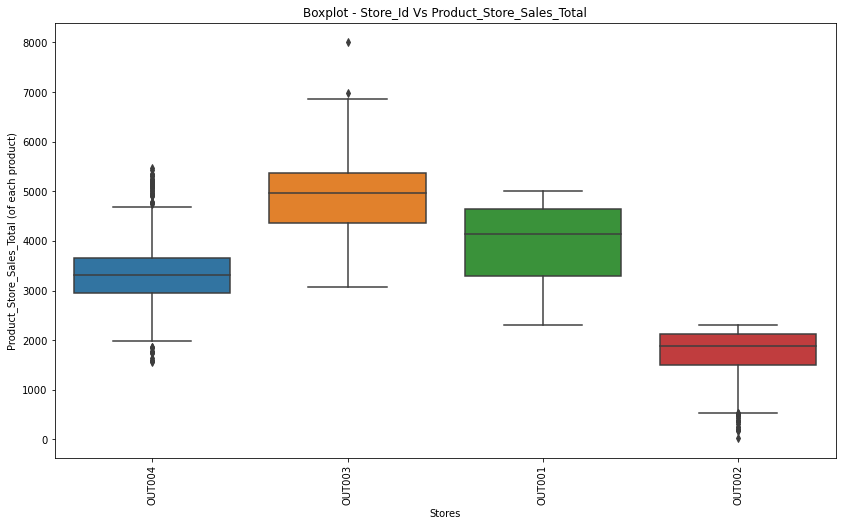

In [ ]:
plt.figure(figsize = [14, 8])
sns.boxplot(data.MULTICLASS_COLUMN_NAME, data.TARGET_VARIABLE)
plt.xticks(rotation = 90)
plt.title("TITLE")
plt.xlabel("X axis labl")
plt.ylabel("Target Variable Label")
plt.show()

**Observations:**
- xxxx

-------
## **Visualize relationships between columns**
---------

CHANGE THIS

**Generally certain product types will have higher product weight than others. Let's have a look.**

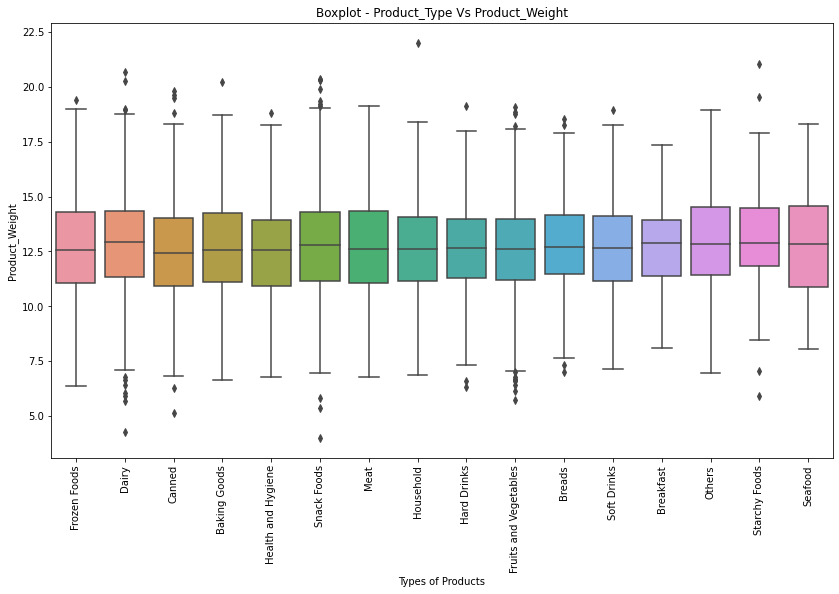

In [ ]:
plt.figure(figsize = [14, 8])
sns.boxplot(data.Product_Type, data.Product_Weight)
plt.xticks(rotation = 90)
plt.title("Boxplot - Product_Type Vs Product_Weight")
plt.xlabel("Types of Products")
plt.ylabel("Product_Weight")
plt.show()

**Observation:**
- xxxx

CHANGE THIS TOO

**Let's find out whether there is some relationship between the weight of the product and its sugar content**

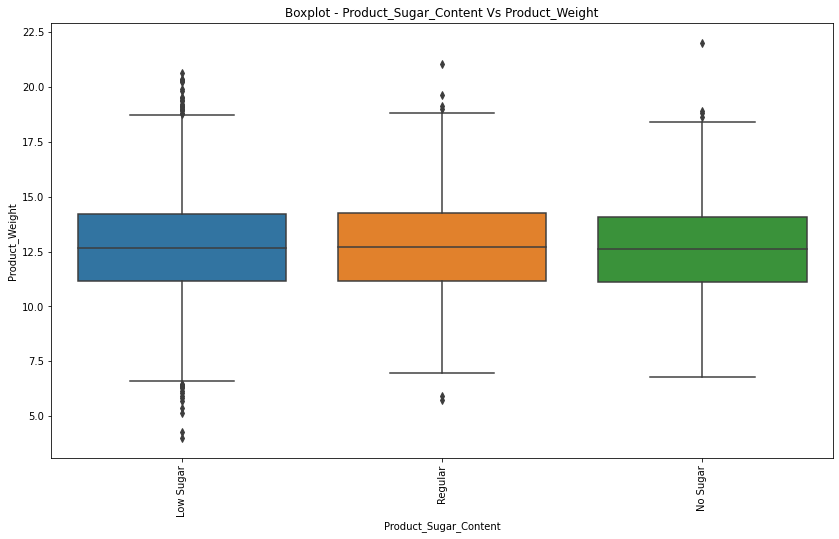

In [ ]:
plt.figure(figsize = [14, 8])
sns.boxplot(data.Product_Sugar_Content, data.Product_Weight)
plt.xticks(rotation = 90)
plt.title("Boxplot - Product_Sugar_Content Vs Product_Weight")
plt.xlabel("Product_Sugar_Content")
plt.ylabel("Product_Weight")
plt.show()

**Observation:**
- xxxx

-------
## **Visualize one numerical column against a multi-class categorical**
--------


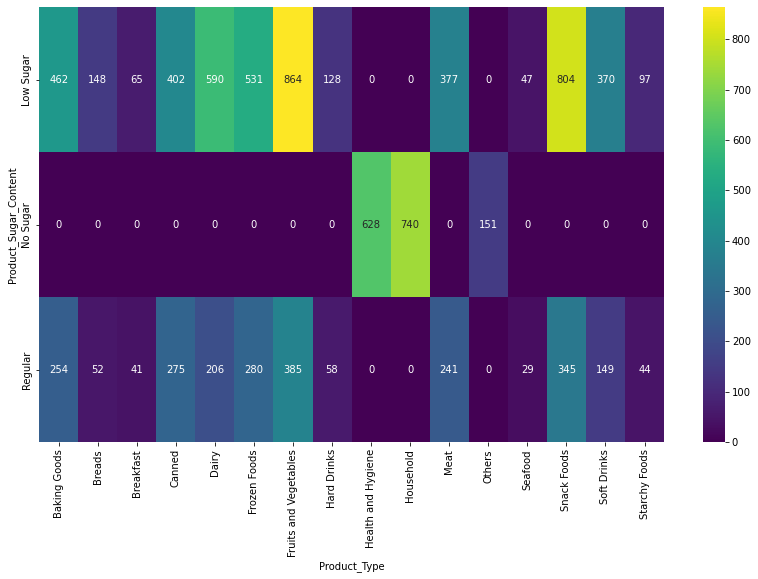

In [ ]:
plt.figure(figsize = (14, 8))
sns.heatmap(
    pd.crosstab(data["NUM_COLUMN_NAME"], data["CAT_COLUMN_NAME"]),
    annot = True,
    fmt = "g",
    cmap = "viridis",
)
plt.ylabel("numerical LABEL")
plt.xlabel("categorical LABEL")
plt.show()

**Observation:**
- xxx

**Different product types have different prices. Let's analyze the trend.**

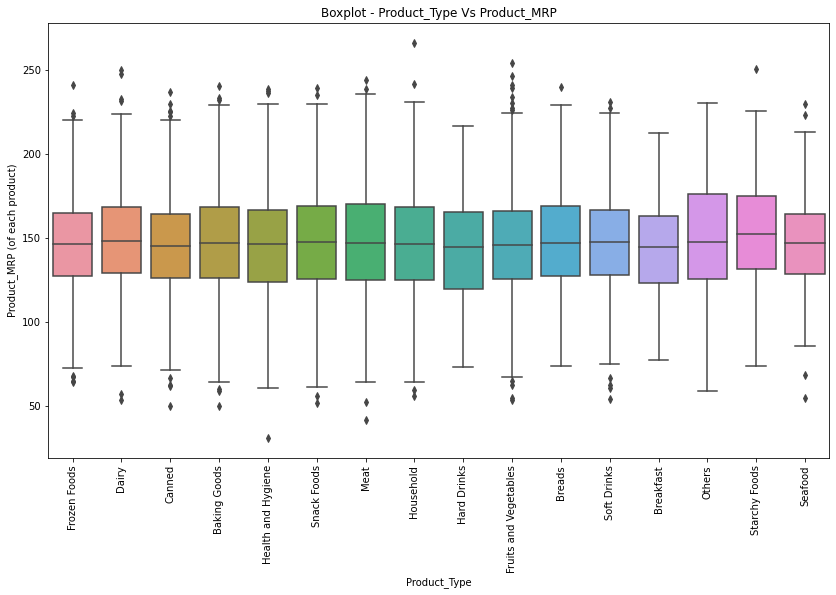

In [ ]:
plt.figure(figsize = [14, 8])
sns.boxplot(data.Product_Type, data.Product_MRP)
plt.xticks(rotation = 90)
plt.title("Boxplot - Product_Type Vs Product_MRP")
plt.xlabel("Product_Type")
plt.ylabel("Product_MRP (of each product)")
plt.show()

**Observation:**
- xxx

**Let's find out how the Product_MRP varies with the different stores**

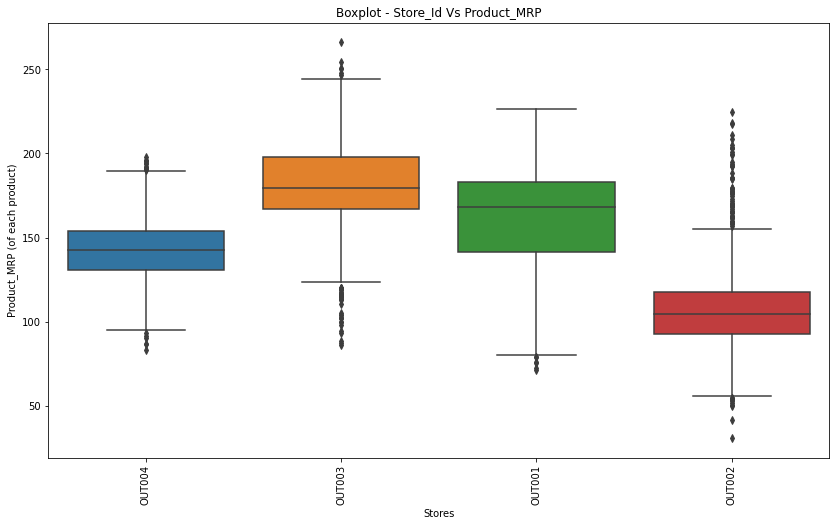

In [ ]:
plt.figure(figsize = [14, 8])
sns.boxplot(data.Store_Id, data.Product_MRP)
plt.xticks(rotation = 90)
plt.title("Boxplot - Store_Id Vs Product_MRP")
plt.xlabel("Stores")
plt.ylabel("Product_MRP (of each product)")
plt.show()

**Observation:**
- xxx

-----
**Stat analysis of subclasses per relevant cat col**.

### **relevant info**

In [ ]:
data.loc[data["Store_Id"] == "OUT001"].describe(include = "all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Product_Weight,1586.0,NaN,NaN,NaN,13.458865,2.064975,6.16,12.0525,13.96,14.95,17.97
Product_Sugar_Content,1586,3,Low Sugar,845,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Product_Allocated_Area,1586.0,NaN,NaN,NaN,0.068768,0.047131,0.004,0.033,0.0565,0.094,0.295
Product_Type,1586,16,Snack Foods,202,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Product_MRP,1586.0,NaN,NaN,NaN,160.514054,30.359059,71.35,141.72,168.32,182.9375,226.59
Store_Id,1586,1,OUT001,1586,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Store_Establishment_Year,1586.0,NaN,NaN,NaN,1987.0,0.0,1987.0,1987.0,1987.0,1987.0,1987.0
Store_Size,1586,1,High,1586,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Store_Location_City_Type,1586,1,Tier 2,1586,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Store_Type,1586,1,Supermarket Type1,1586,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Observations:**
- xxxx

In [ ]:
data.loc[data["Store_Id"] == "OUT001", "Product_Store_Sales_Total"].sum()

6223113.18

**OUT001 has generated total revenue of 6223113 from the sales of goods.**

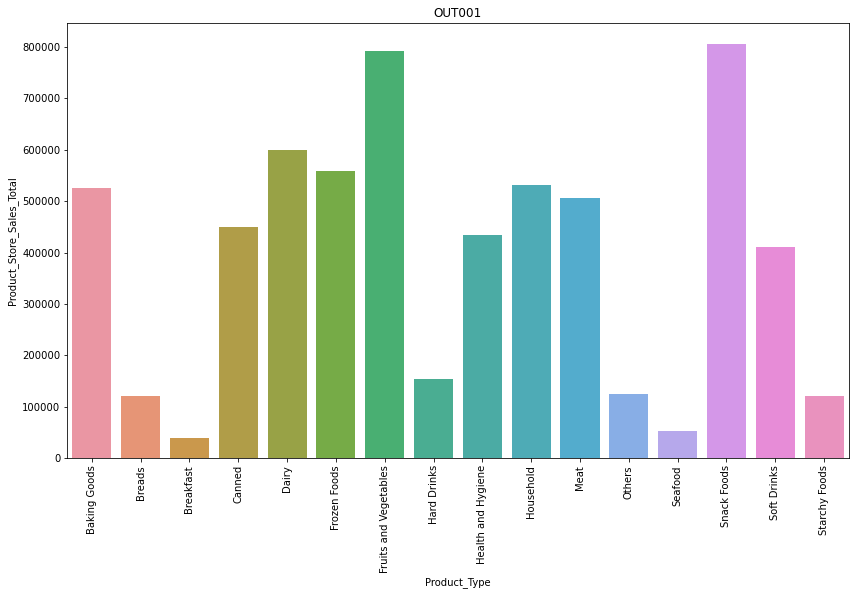

In [ ]:
df_OUT001 = (
    data.loc[data["Store_Id"] == "OUT001"]
    .groupby(["Product_Type"], as_index = False)["Product_Store_Sales_Total"]
    .sum()
)
plt.figure(figsize = [14, 8])
plt.xticks(rotation = 90)
plt.xlabel("Product_Type")
plt.ylabel("Product_Store_Sales_Total")
plt.title("OUT001")
sns.barplot(x = df_OUT001.Product_Type, y = df_OUT001.Product_Store_Sales_Total)
plt.show()

**Observations:**
- xxxx

**Let's find out the revenue generated by the stores from each of the product types**.

In [ ]:
df1 = data.groupby(["Product_Type", "Store_Id"], as_index = False)[
    "Product_Store_Sales_Total"
].sum()
df1

,Product_Type,Store_Id,Product_Store_Sales_Total
0,Baking Goods,OUT001,525131.04
1,Baking Goods,OUT002,169860.50
2,Baking Goods,OUT003,491908.20
3,Baking Goods,OUT004,1266086.26
4,Breads,OUT001,121274.09
5,Breads,OUT002,43419.47
6,Breads,OUT003,175391.93
7,Breads,OUT004,374856.75
8,Breakfast,OUT001,38161.10
9,Breakfast,OUT002,23396.10


**Observations:**
- xxx

**Let's find out the revenue generated by the stores from products having different levels of sugar content**.

In [ ]:
df2 = data.groupby(["Product_Sugar_Content", "Store_Id"], as_index = False)[
    "Product_Store_Sales_Total"
].sum()
df2

,Product_Sugar_Content,Store_Id,Product_Store_Sales_Total
0,Low Sugar,OUT001,3300834.93
1,Low Sugar,OUT002,1156758.85
2,Low Sugar,OUT003,3706903.24
3,Low Sugar,OUT004,8658908.78
4,No Sugar,OUT001,1090353.78
5,No Sugar,OUT002,382162.19
6,No Sugar,OUT003,1123084.57
7,No Sugar,OUT004,2674343.14
8,Regular,OUT001,1831924.47
9,Regular,OUT002,491988.68


**Observation:**
- xxx

--------
## **Data Preprocessing**
-----------

## **Feature Engineering**

**A store which has been in the business for a long duration is more trustworthy than the newly established ones. On the other hand, older stores may sometimes lack infrastructure if proper attention is not given. So let us calculate the current age of the store and incorporate that in our model.** 

In [ ]:
# Outlet Age
data["Store_Age_Years"] = 2022 - data.Store_Establishment_Year

**We have 16 different product types in our dataset. So let us make two broad categories, perishables and non perishables, in order to reduce the number of product types.**

In [ ]:
perishables = [
    "Dairy",
    "Meat",
    "Fruits and Vegetables",
    "Breakfast",
    "Breads",
    "Seafood",
]

In [ ]:
def change(x):
    if x in perishables:
        return "Perishables"
    else:
        return "Non Perishables"


data.Product_Type.apply(change)

0       Non Perishables
1           Perishables
2       Non Perishables
3       Non Perishables
4       Non Perishables
             ...       
8758    Non Perishables
8759    Non Perishables
8760    Non Perishables
8761    Non Perishables
8762    Non Perishables
Name: Product_Type, Length: 8763, dtype: object

In [ ]:
change1 = []
for i in range(0, len(data)):
    if data.Product_Type[i] in perishables:
        change1.append("Perishables")
    else:
        change1.append("Non Perishables")

In [ ]:
data["Product_Type_Category"] = pd.Series(change1)

In [ ]:
data.head()

,Product_Weight,Product_Sugar_Content,Product_Allocated_Area,Product_Type,Product_MRP,Store_Id,Store_Establishment_Year,Store_Size,Store_Location_City_Type,Store_Type,Product_Store_Sales_Total,Product_Id_char,Store_Age_Years,Product_Type_Category
0,12.66,Low Sugar,0.027,Frozen Foods,117.08,OUT004,2009,Medium,Tier 2,Supermarket Type2,2842.40,FD,13,Non Perishables
1,16.54,Low Sugar,0.144,Dairy,171.43,OUT003,1999,Medium,Tier 1,Departmental Store,4830.02,FD,23,Perishables
2,14.28,Regular,0.031,Canned,162.08,OUT001,1987,High,Tier 2,Supermarket Type1,4130.16,FD,35,Non Perishables
3,12.10,Low Sugar,0.112,Baking Goods,186.31,OUT001,1987,High,Tier 2,Supermarket Type1,4132.18,FD,35,Non Perishables
4,9.57,No Sugar,0.010,Health and Hygiene,123.67,OUT002,1998,Small,Tier 3,Food Mart,2279.36,NC,24,Non Perishables


-----------
## **Characterize Outliers**

-----------

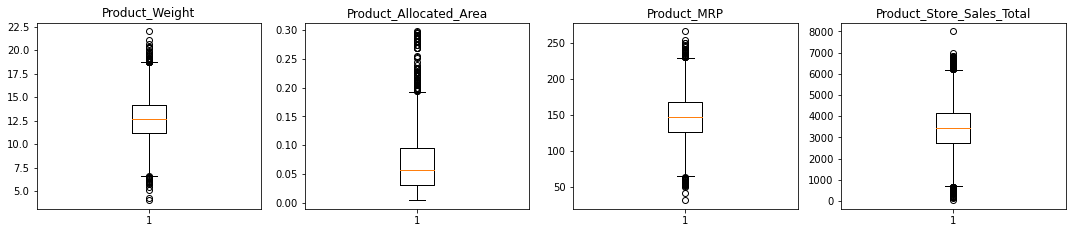

In [ ]:

numeric_columns = data.select_dtypes(include=np.number).columns.tolist()
numeric_columns.remove("Store_Establishment_Year")
numeric_columns.remove("Store_Age_Years")


plt.figure(figsize = (15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(data[variable], whis = 1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

**Observations:**

- xxx

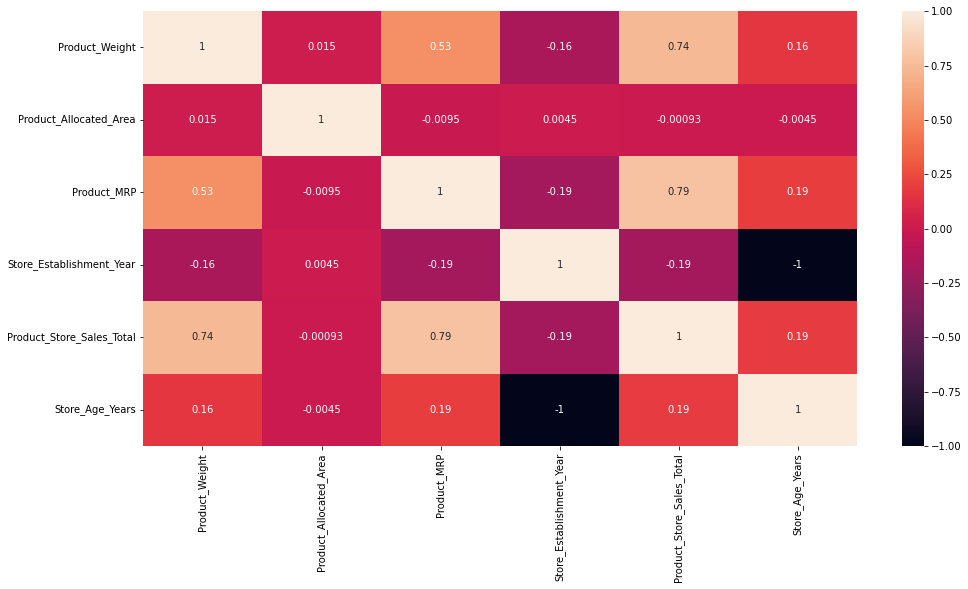

In [ ]:
plt.figure(figsize = (16, 8))
sns.heatmap(data.corr(), annot = True)
plt.show()

**Observations:**
- xxxx

----------
## **Data Preparation for modeling**
------------

-------
## **Objectives:**
- What is the target variable?
- Which categorical features need to be encoded?
- Which columns can be dropped?
- Data needs to be split out to training and testing data subsets
--------

In [ ]:
# Drop these columns XXXXX XXXXX

data = data.drop(["Product_Type", "Store_Id", "Store_Establishment_Year"], axis = 1)

In [ ]:
# Generate dummy variables

data = pd.get_dummies(
    data,
    columns = data.select_dtypes(include = ["object", "category"]).columns.tolist(),
    drop_first = True,
)

In [ ]:
# Separating features and the target variable

X = data.drop(["Product_Store_Sales_Total"], axis = 1)
y = data["Product_Store_Sales_Total"]

In [ ]:
X = sm.add_constant(X)

In [ ]:
# Split the data into train and test sets in 70:30 ratio (or 80/20)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.30, random_state = 1)

----------
## **Check for Multicollinearity**
----------

## **Objectives:**

- Use the Variance Inflation Factor (VIF), to characterize multicollinearity in the data.
- Those features with a VIF score > 5 will be dropped / processed till all the features have a VIF score < 5

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Method to check VIF

def checking_vif(train):
    vif = pd.DataFrame()
    vif["feature"] = train.columns

    # Calculate VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(train.values, i) for i in range(len(train.columns))
    ]
    return vif


                              feature       VIF
0                               const  0.000000
1                      Product_Weight  1.752928
2              Product_Allocated_Area  1.001184
3                         Product_MRP  1.885058
4                     Store_Age_Years       inf
5      Product_Sugar_Content_No Sugar       inf
6       Product_Sugar_Content_Regular  1.088506
7                   Store_Size_Medium       inf
8                    Store_Size_Small       inf
9     Store_Location_City_Type_Tier 2       inf
10    Store_Location_City_Type_Tier 3       inf
11               Store_Type_Food Mart       inf
12       Store_Type_Supermarket Type1       inf
13       Store_Type_Supermarket Type2       inf
14                 Product_Id_char_FD  2.774371
15                 Product_Id_char_NC       inf
16  Product_Type_Category_Perishables  1.217690


In [ ]:
print(checking_vif(X_train))

**Observations:**
- xxxx

### **Drop columns**

In [ ]:
X_train = X_train.drop('Store_Age_Years',axis = 1)

X_test = X_test.drop('Store_Age_Years',axis = 1)

--------
## **Check the VIF again**
---------

In [ ]:
print(checking_vif(X_train))

                              feature       VIF
0                               const  0.000000
1                      Product_Weight  1.752928
2              Product_Allocated_Area  1.001184
3                         Product_MRP  1.885058
4      Product_Sugar_Content_No Sugar       inf
5       Product_Sugar_Content_Regular  1.088506
6                   Store_Size_Medium       inf
7                    Store_Size_Small       inf
8     Store_Location_City_Type_Tier 2       inf
9     Store_Location_City_Type_Tier 3       inf
10               Store_Type_Food Mart       inf
11       Store_Type_Supermarket Type1       inf
12       Store_Type_Supermarket Type2       inf
13                 Product_Id_char_FD  2.774371
14                 Product_Id_char_NC       inf
15  Product_Type_Category_Perishables  1.217690


---------
# **Building Models**
---------

-----------
## **Method for generating Performance Metrics**
----------

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_percentage_error, mean_absolute_error, mean_squared_error

# Model Performance on test and train data

def model_pref(olsmodel, x_train, x_test):

    # In-sample Prediction

    y_pred_train = olsmodel.predict(x_train)
    y_observed_train = y_train

    # Prediction on test data
    
    y_pred_test = olsmodel.predict(x_test)
    y_observed_test = y_test

    print(
        pd.DataFrame(
            {
                "Data": ["Train", "Test"],
                "RMSE": [
                    np.sqrt(mean_squared_error(y_pred_train, y_observed_train)),
                    np.sqrt(mean_squared_error(y_pred_test, y_observed_test)),
                ],
                "MAE": [
                    mean_absolute_error(y_pred_train, y_observed_train),
                    mean_absolute_error(y_pred_test, y_observed_test),
                ],
                
                "r2": [
                    r2_score(y_pred_train, y_observed_train),
                    r2_score(y_pred_test, y_observed_test),
                ],
            }
        )
    )

-----
## **Fit the FIRST model**
------

In [82]:
model1 = sm.OLS(y_train, X_train).fit()

# Show the model summary
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     Product_Store_Sales_Total   R-squared:                       0.824
Model:                                   OLS   Adj. R-squared:                  0.823
Method:                        Least Squares   F-statistic:                     2860.
Date:                       Tue, 16 Aug 2022   Prob (F-statistic):               0.00
Time:                               16:19:05   Log-Likelihood:                -46132.
No. Observations:                       6134   AIC:                         9.229e+04
Df Residuals:                           6123   BIC:                         9.236e+04
Df Model:                                 10                                         
Covariance Type:                   nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                               176.6077     42.659      4.140      0.000      92.982     260.234
Product_Weight                      135.0943      3.436     39.318      0.000     128.359     141.830
Product_Allocated_Area             -139.5679    118.876     -1.174      0.240    -372.608      93.472
Product_MRP                          12.8696      0.254     50.702      0.000      12.372      13.367
Product_Sugar_Content_No Sugar       16.0039     12.324      1.299      0.194      -8.155      40.163
Product_Sugar_Content_Regular        30.8608     13.284      2.323      0.020       4.819      56.902
Store_Size_Medium                   394.3947     26.547     14.856      0.000     342.353     446.436
Store_Size_Small                   -383.1731      5.776    -66.339      0.000    -394.496    -371.850
Store_Location_City_Type_Tier 2    -308.1516      8.855    -34.801      0.000    -325.510    -290.794
Store_Location_City_Type_Tier 3    -383.1731      5.776    -66.339      0.000    -394.496    -371.850
Store_Type_Food Mart               -383.1731      5.776    -66.339      0.000    -394.496    -371.850
Store_Type_Supermarket Type1        165.3861     17.762      9.311      0.000     130.566     200.206
Store_Type_Supermarket Type2       -473.5378     17.176    -27.570      0.000    -507.208    -439.867
Product_Id_char_FD                    0.3932     21.936      0.018      0.986     -42.609      43.396
Product_Id_char_NC                   16.0039     12.324      1.299      0.194      -8.155      40.163
Product_Type_Category_Perishables     7.7111     13.233      0.583      0.560     -18.231      33.653
==============================================================================
Omnibus:                     1745.262   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            46497.082
Skew:                           0.775   Prob(JB):                         0.00
Kurtosis:                      16.399   Cond. No.                     8.67e+19
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.85e-32. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

-----
## **Characterize first model performance using the method created above**
------

In [83]:

model_pref(model1, X_train, X_test)

    Data        RMSE         MAE        r2
0  Train  446.667654  262.110666  0.785927
1   Test  446.685287  266.690587  0.790208


**Observations:**
- xxxx

---------
##  **Drop insignificant variables (variables with p-value > 0.05).**
--------

In [84]:
X_train1 = X_train.drop(["Product_Type_Category_Perishables", "Product_Id_char_FD"], axis = 1)

In [85]:
X_test1 = X_test.drop(["Product_Type_Category_Perishables", "Product_Id_char_FD"], axis = 1)

-----
## **Fit the SECOND model**
------

In [86]:
model2 = sm.OLS(y_train, X_train1).fit()

# Show the model summary
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     Product_Store_Sales_Total   R-squared:                       0.824
Model:                                   OLS   Adj. R-squared:                  0.823
Method:                        Least Squares   F-statistic:                     3576.
Date:                       Tue, 16 Aug 2022   Prob (F-statistic):               0.00
Time:                               16:19:05   Log-Likelihood:                -46132.
No. Observations:                       6134   AIC:                         9.228e+04
Df Residuals:                           6125   BIC:                         9.234e+04
Df Model:                                  8                                         
Covariance Type:                   nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                             179.0666     40.949      4.373      0.000      98.793     259.340
Product_Weight                    135.0918      3.435     39.323      0.000     128.357     141.827
Product_Allocated_Area           -140.3752    118.852     -1.181      0.238    -373.367      92.616
Product_MRP                        12.8703      0.254     50.727      0.000      12.373      13.368
Product_Sugar_Content_No Sugar     14.1944      7.933      1.789      0.074      -1.358      29.747
Product_Sugar_Content_Regular      30.7219     13.272      2.315      0.021       4.704      56.740
Store_Size_Medium                 395.6741     25.835     15.316      0.000     345.029     446.319
Store_Size_Small                 -382.7595      5.395    -70.953      0.000    -393.335    -372.184
Store_Location_City_Type_Tier 2  -307.8490      8.636    -35.648      0.000    -324.778    -290.920
Store_Location_City_Type_Tier 3  -382.7595      5.395    -70.953      0.000    -393.335    -372.184
Store_Type_Food Mart             -382.7595      5.395    -70.953      0.000    -393.335    -372.184
Store_Type_Supermarket Type1      166.1521     17.353      9.575      0.000     132.135     200.169
Store_Type_Supermarket Type2     -474.0011     17.074    -27.762      0.000    -507.472    -440.530
Product_Id_char_NC                 14.1944      7.933      1.789      0.074      -1.358      29.747
==============================================================================
Omnibus:                     1744.629   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            46526.548
Skew:                           0.775   Prob(JB):                         0.00
Kurtosis:                      16.403   Cond. No.                     1.53e+35
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.93e-63. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

-----
## **Check SECOND model performance metrics**
------

In [87]:
# Checking model2 performance
model_pref(model2, X_train1, X_test1)

    Data        RMSE         MAE        r2
0  Train  446.681336  262.125308  0.785911
1   Test  446.780252  266.790089  0.790113


**Observations:**
- xxxx

-----
### **Check list to see if the linear regression assumptions have been met**
-------


1) **Mean of residuals = 0**
2) **No Heteroscedasticity**
3) **Linearity of variables**
4) **Normality of error terms**

## **1) Check for mean residuals on the SECOND model**

In [88]:
residuals = model2.resid

np.mean(residuals)

-4.896207049550968e-12

**Observations:**

- Is it at or very near zero?

--------
### **2) Check for Homoscedasticity**
---------

- **Homoscedasticity** - Are the residuals **symmetrically distributed across the regression line**? If yes =  data is homoscedastic.

- **Heteroscedasticity** - Are the residuals are **NOT** symmetrically distributed across the regression line? If yes =  data is heteroscedastic. (residuals may form a funnel shape or any other non-symmetrical shape)

- Use the `**Goldfeldquandt Test**` to test the following hypothesis with alpha = 0.05:

    - Null hypothesis: Residuals are homoscedastic
    - Alternate hypothesis: Residuals have heteroscedastic

In [89]:
# Load relevant libraries

from statsmodels.stats.diagnostic import het_white

from statsmodels.compat import lzip

import statsmodels.stats.api as sms

In [90]:

name = ["F statistic", "p-value"]

test = sms.het_goldfeldquandt(y_train, X_train1)

lzip(name, test)

[('F statistic', 0.9832189770563923), ('p-value', 0.6800664494252275)]

**Observations:**

- REPLACE THIS WITH ACTUAL OBS - Since p-value > 0.05, we cannot reject the Null Hypothesis that the residuals are homoscedastic and the corresponding assumption is satisfied.

----------
## **3) Linearity of variables**
-----------

- Predictor variables must have a **linear** relationship to the dependent variable.

- To test, plot residuals and fitted values on a plot
    - Look for strong patterns in the residuals
    - Residuals should be **randomly and uniformly scattered on the x-axis**

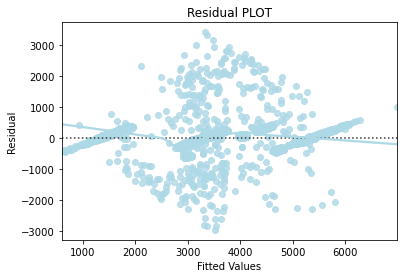

In [91]:
# Predicted values

fitted = model2.fittedvalues

# sns.set_style("whitegrid")

sns.residplot(x = fitted, y = residuals, color = "lightblue", lowess = True)

plt.xlabel("Fitted Values")

plt.ylabel("Residual")

plt.title("Residual PLOT")

plt.show()

**Observations:**

- REPLACE WITH ACTUAL OBS There is no pattern in the residual vs fitted values plot. Hence, the corresponding assumption is satisfied.

---------
## **4) Check for normality of error terms**
---------

- **Residuals should be normally distributed**.

<AxesSubplot:ylabel='Count'>

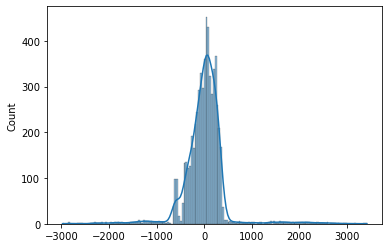

In [92]:
# Plot histogram of residuals
sns.histplot(residuals, kde = True)

## **Create the q-q plot of residuals**

In [ ]:
# Import relevant libraries

import pylab

import scipy.stats as stats

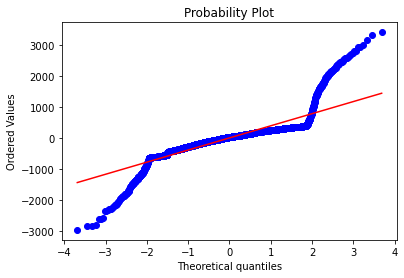

In [93]:
stats.probplot(residuals, dist = "norm", plot = pylab)

plt.show()

**Observations:**

- REPLACE WITH ACTUAL OBS From the above plots, the residuals seem to follow a normal distribution. Hence, the corresponding assumption is satisfied. Now, we will check the model performance on the train and test dataset.

-------
# **Cross-Validation**
-------

- **Cross-validation will improve the model** 
- **Model is valuated using different metrics**

------
## **Create a Regression Model**
------

### **Import relevant assets**

In [ ]:
from sklearn.model_selection import cross_val_score

In [95]:
# Build the regression model and cross-validate

linearregression = LinearRegression()                                    

cv_Score11 = cross_val_score(linearregression, X_train, y_train, cv = 10)
cv_Score12 = cross_val_score(linearregression, X_train, y_train, cv = 10, 
                             scoring = 'neg_mean_squared_error')                                  


print("RSquared: %0.3f (+/- %0.3f)" % (cv_Score11.mean(), cv_Score11.std() * 2))
print("Mean Squared Error: %0.3f (+/- %0.3f)" % (-1*cv_Score12.mean(), cv_Score12.std() * 2))

RSquared: 0.823 (+/- 0.045)
Mean Squared Error: 200712.689 (+/- 64085.512)


**Observation:**
- REPLACE WITH ACTUAL OBS After applying cross-validation the model score has improved. We can compare it by the evaluation metric scores.

---------
## **Conclusions (Actionable Insights and Business Recommendations)**
--------

# **REPLACE WITH ACTUAL OBSERVATIONS**

- We can use this forecasting model to predict the total sales that will be done by SuperKart in the next quarter.

- The model explains around 79% of the variation in the data.

- **OUT004** - OUT004, which is of Supermarket Type2, located in a Tier 2 city and having store size as medium, is performing well. SuperKart can look to increase the size of this store from medium to high. They can also look to set up stores in this type of city having comparable socio-economic conditions in order to expand their business and reach.

- **OUT002** - OUT002, being a food mart in a Tier 3 city and having small store size, is also performing well. SuperKart can look to upgrade its size or target similar cities for business expansion.

- **OUT001** - OUT001 which is a store of Supermarket Type 1, located in a Tier 2 city and having store size as high is not performing upto the mark. SuperKart can look to look build new marketing strategies (maybe give attractive discounts and offers) in this store in order to attract more customers.

- **OUT003** - Similar approach can be taken to increase the business of OUT003 which is a Departmental store in a Tier 1 city and having store size as medium. It is the premium store of the company where most of the costly goods are sold, so the correct set of audience should be targetted.

- Daily needs like fruits and vegetables and snack foods are the biggest contributors to the revenue across all the stores. So SuperKart should look to maintain the inventory of these products properly and ensure that these products never face a shortage.

**Additional information that can be collected to gain better insights -**

- Customers' details like age and gender can be incorporated in this model so that the company gets to know their target audience well and can build their sales strategies according to that.

- The company should also keep a watch for the number of festive occasions present in a quarter so that they can strategize their inventory accordingly.